## Neural Networks with sci-kit learn Perceptron

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Initial data load, visualization and preparation

In [2]:
#Reading database csv
db = pd.read_csv('db.csv')
db

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.70,4.70,2.70,-0.30,0.70,0.70,2.70,1.70,1.70,0.70,...,-0.30,-0.30,-0.30,0.70,-0.30,0.70,-1.30,-1.30,-0.30,5
96,11.55,5.55,2.55,1.55,0.55,1.55,0.55,0.55,-0.45,0.55,...,0.55,-0.45,0.55,-1.45,0.55,-0.45,0.55,-0.45,0.55,6
97,14.35,4.35,1.35,2.35,-0.65,0.35,0.35,1.35,0.35,0.35,...,-0.65,0.35,-0.65,0.35,-1.65,0.35,0.35,0.35,-0.65,6
98,22.70,-5.30,-0.30,-5.30,-1.30,-3.30,-1.30,-3.30,-2.30,-3.30,...,-2.30,1.70,-1.30,1.70,-0.30,0.70,-2.30,0.70,-1.30,7


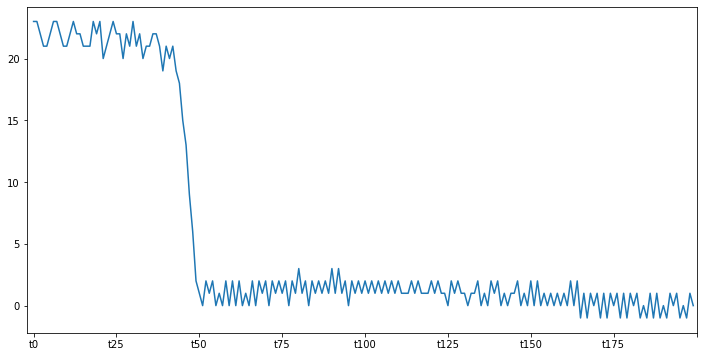

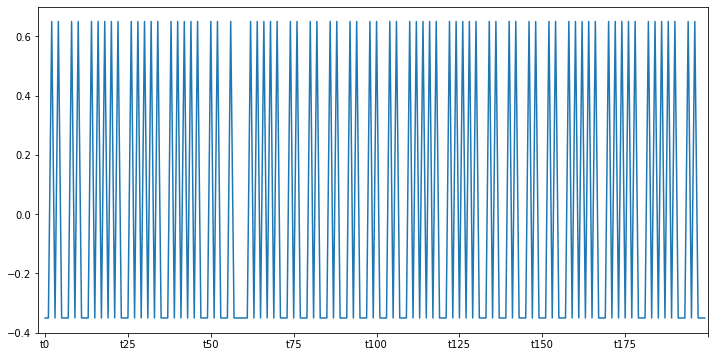

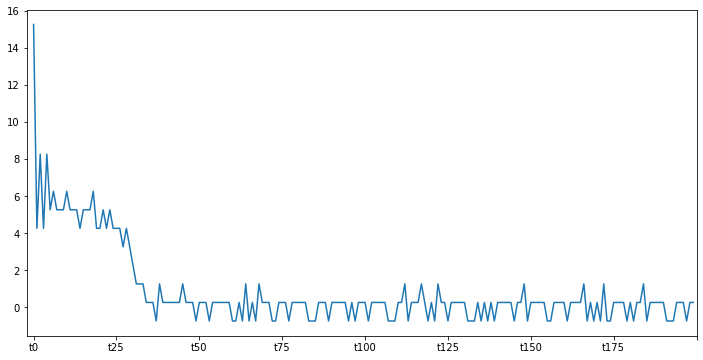

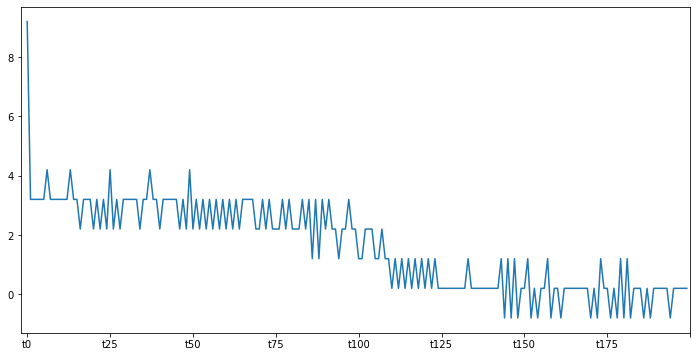

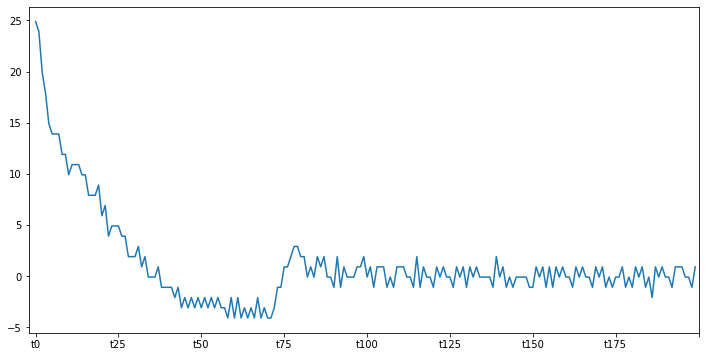

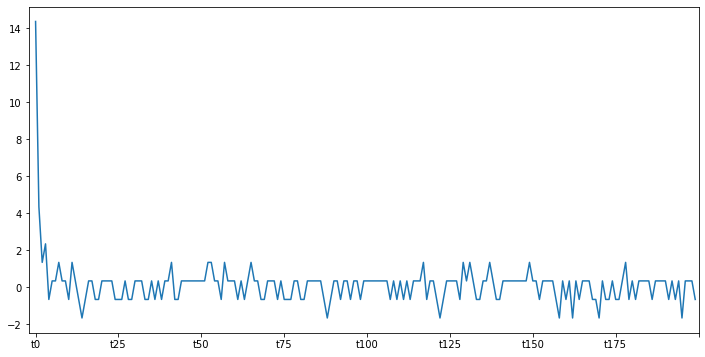

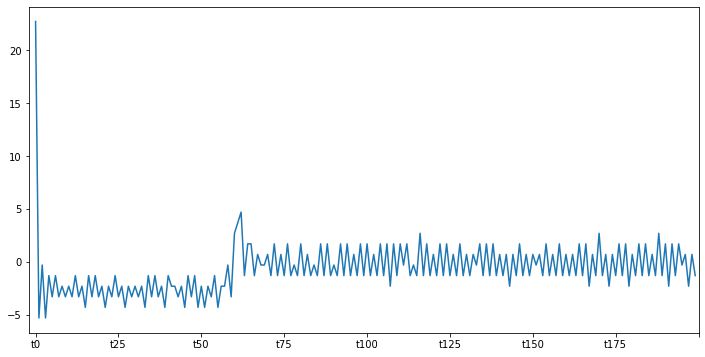

In [3]:
#Function created to plot the Classes graphics below
def plotClass(df,classe,linha=1):
    df1 = df[df['Classes'] == classe]
    df1.iloc[linha,:-1].T.plot(kind='line', figsize=(12, 6))
    plt.xlim([-2, 200])
    plt.show()

for classe in range(1,8):
    plotClass(db,classe)

In [4]:
#using get_dummies function to separate our target variable y
dummy = pd.get_dummies(db['Classes'])
db = pd.concat([db, dummy], axis=1)
db.drop('Classes', axis = 1, inplace=True)

y = db[[1,2,3,4,5,6,7]]
x = db.drop([1,2,3,4,5,6,7], axis =1)

In [5]:
#stratify assures all classes are included on train test split samples
#MLPClassifier has internal validation, there's no need for a third split on our data (validation split wouldn't be really useful in a dataset this small)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


## Running ANN with sci-kit learn Perceptron

In [ ]:
#parameters dict for gridsearch
parameters = {'hidden_layer_sizes':range(1,40,2), 'activation':('identity', 'logistic', 'tanh', 'relu'), 'solver':('lbfgs', 'sgd', 'adam')}

#defining gridsearch model
clf_grid = MLPClassifier(random_state=1, learning_rate_init = 0.001, validation_fraction= 0.1, early_stopping = True, verbose=True)
grid = GridSearchCV(clf_grid, parameters)
grid.fit(x_train, y_train)
grid_model = grid.best_estimator_

In [34]:
#Running the model after empirical parameter changes (optimal parameters can be obtained after gridsearch results)
clf = MLPClassifier(activation= 'relu', solver = 'lbfgs', hidden_layer_sizes=(50,10,10), random_state=0, max_iter=100, verbose=True,learning_rate_init=0.001).fit(x_train, y_train)

y_predict = clf.predict(x_test)

print('Accuracy Score:',clf.score(x_test,y_test))

## Checking if PCA would help us improve the model

In [41]:
#fitting data using PCA
pca = PCA().fit(x_train)

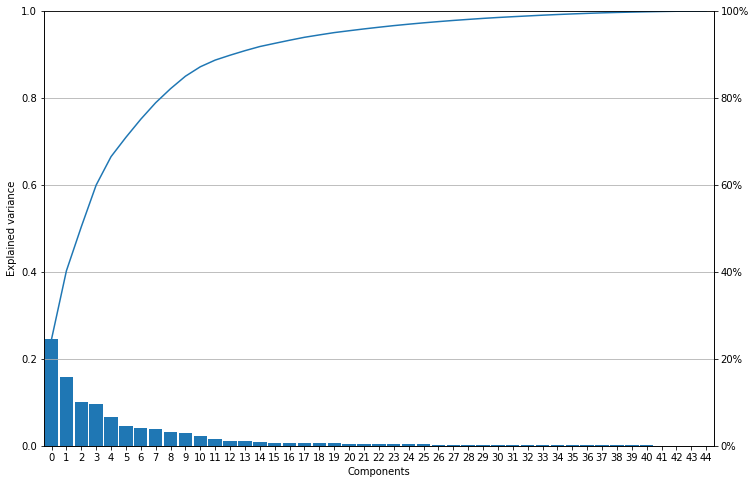

In [42]:
#Using Pareto chart to visualize how the PCA could help reducing number of components needed for optimal results

from paretochart.paretochart import pareto

fig, ax = plt.subplots(figsize=(12, 8))
pareto(pca.explained_variance_ratio_)
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance')
plt.grid()

In [151]:
#fitting and transforming after PCA

pca = PCA(n_components=0.94)
pca.fit(x_train)
x_pca_Train = pca.transform(x_train)

In [ ]:
#parameters dict for gridsearch
parameters = {'hidden_layer_sizes':range(1,40,2), 'activation':('identity', 'logistic', 'tanh', 'relu'), 'solver':('lbfgs', 'sgd', 'adam')}

#defining gridsearch model
clf_grid = MLPClassifier(max_iter=300, random_state=1, learning_rate_init = 0.001, validation_fraction= 0.1, early_stopping = True, verbose=True)
gridmodel = GridSearchCV(clf_grid, parameters)
gridmodel.fit(x_train, y_train)
print(gridmodel.best_estimator_)
model = gridmodel.best_estimator_

In [152]:
#running Perceptron again after PCA
clf_PCA = MLPClassifier(activation= 'relu',solver = 'lbfgs', hidden_layer_sizes=(15,10,10), random_state=1, max_iter=100, verbose=True,learning_rate_init=0.001).fit(x_pca_Train, y_train)

In [160]:
#transforming and checking accuracy score
x_pca_Test = pca.transform(x_test)
pca_predict = clf_PCA.predict(x_pca_Test)
print('Accuracy Score:',clf.score(x_pca_Test,y_test))

Accuracy Score: 0.8666666666666667


## Metrics Comparison

Initial Metrics without using PCA

In [157]:
print(metrics.classification_report(y_test, y_predict, digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.75      1.00      0.86         6
           2       0.67      0.67      0.67         6
           3       1.00      0.60      0.75         5
           4       1.00      0.60      0.75         5
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         0

   micro avg       0.86      0.80      0.83        30
   macro avg       0.77      0.70      0.72        30
weighted avg       0.88      0.80      0.82        30
 samples avg       0.80      0.80      0.80        30



Final metrics after reducing the number of components using PCA

In [158]:
print(metrics.classification_report(y_test, pca_predict, digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.75      1.00      0.86         6
           2       0.75      1.00      0.86         6
           3       1.00      0.60      0.75         5
           4       1.00      0.60      0.75         5
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         0

   micro avg       0.87      0.87      0.87        30
   macro avg       0.79      0.74      0.74        30
weighted avg       0.90      0.87      0.86        30
 samples avg       0.87      0.87      0.87        30

